In [16]:
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

# Helping functions 

In [103]:
# Read all images from path 
def read_database_images(dir_path):
    database_images = []
    #accept_exts = ['.jpg','.jpeg','.bmp','.png']
    accept_exts = ['.jpg']
    
    for root,dirs,files in os.walk(dir_path):
        for file in files:
            if os.path.splitext(file)[1].lower() in accept_exts:
                database_images.append(os.path.join(root,file))
    
    database_images = sorted(database_images)
    
    if(database_images) == 0:
        print("No images found")
        exit(1)
    
    print('{} images found. Type: {}'.format(len(database_images),type(database_images)))
    
    return database_images

# LOAD IMG
def load_img(path):
    img = cv2.imread(path)
    return img
# SAVE
def saveImg(img_name, img, f_type="", dirpath="output"):
    import datetime; currentDT = datetime.datetime.now().strftime("%y%m%d%H%M%S%f")
    path_str = dirpath +'/'+ img_name + "_" +f_type+'.jpg';
    cv2.imwrite(path_str, img)
# SHOW 1 IMG
def get_RGB(img): return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def showImg(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(get_RGB(img))
# SHOW 4 IMGs
def show4Img(Image1, Image2, Image3, Image4, title1="First", title2="Second", title3="Third", title4="Fourth"): 
    # create figure
    fig = plt.figure(figsize=(13, 13))

    # setting values to rows and column variables
    rows = 2
    columns = 2

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)

    # showing image
    plt.imshow(get_RGB(Image1))
    plt.axis('off')
    plt.title(title1)

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.imshow(get_RGB(Image2))
    plt.axis('off')
    plt.title(title2)

    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)

    # showing image
    plt.imshow(get_RGB(Image3))
    plt.axis('off')
    plt.title(title3)

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)

    # showing image
    plt.imshow(get_RGB(Image4))
    plt.axis('off')
    plt.title(title4)

# Resize Image 
def resize_img(img,resize_param = 0.5):
    
    x = int(img.shape[1] * resize_param) 
    y = int(img.shape[0] * resize_param) 
    size = (x,y)
    temp_img = cv2.resize(img,size)
    
    return temp_img

In [86]:
p1 = load_img('p1.jpg')
nsabi_1 = load_img('nsabi_1.jpg')
nsure_1 = load_img('nsure1.jpg')

# Flip

In [39]:
# Along central x axis
def get_flip_x(img):
    return cv2.flip(img, 0)
# Along central y axis
def get_flip_y(img):
    return cv2.flip(img, 1)
# Along both axis
def get_flip_xy(img):
    return cv2.flip(img, -1)

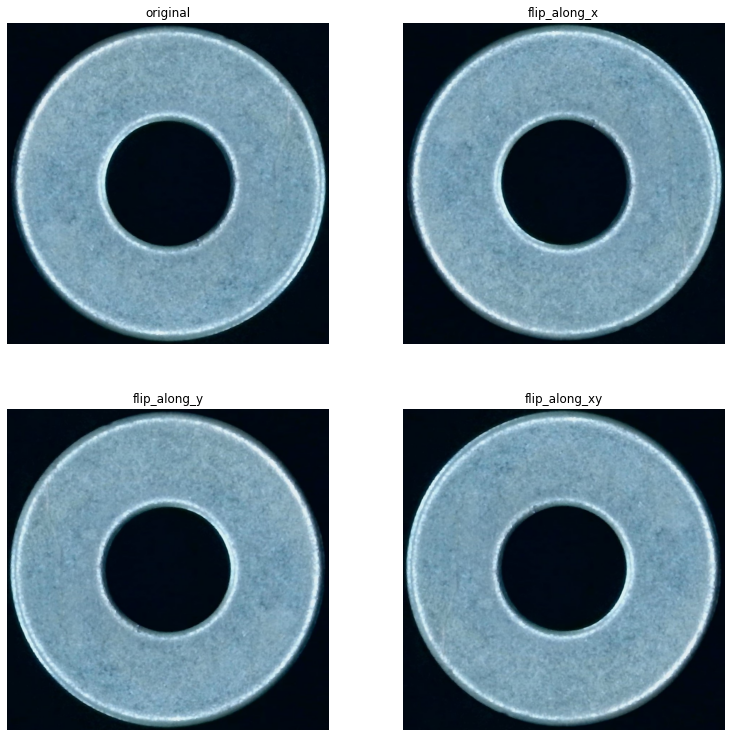

In [40]:
show4Img(p1, get_flip_x(p1), get_flip_y(p1), get_flip_xy(p1), "original", "flip_along_x", "flip_along_y", "flip_along_xy")

# Low Pass Filter with a 2D Convolution 

In [41]:
def get_filter2D(img, shapes = (5,5), div = 10):
    kernel = np.ones(shape=shapes, dtype=np.float32) / div
    return cv2.filter2D(img,-1,kernel)

In [42]:
# Median Blurring 
def get_median_blur(img):
    return cv2.medianBlur(img, 5)

In [43]:
# Bilateral Filtering
def get_blur_bilateralFiltering(img):
    cv2.bilateralFilter(img,9,75,75)

In [44]:
show4Img(p1, get_filter2D(shapes = (5,5), div= 20), get_filter2D(shapes = (4,4), div= 10), get_median_blur(p1), "original", "get_filter2D(5,5), div= 20", "get_filter2D(shapes = (4,4), div= 10", "median_blur")

TypeError: get_filter2D() missing 1 required positional argument: 'img'

In [125]:
img_names = read_database_images('/home/pratham/study/input_data/washer/negative/sure/')
output_dir = "/home/pratham/study/input_data/washer/da_opencv/neg"

#img_names = read_database_images('/home/pratham/study/input_data/washer/positive/')
#output_dir = "/home/pratham/study/input_data/washer/da_opencv/pos/"

31 images found. Type: <class 'list'>


In [126]:
for img_path in img_names:
    img_name = os.path.basename(img_path)
    img_name = os.path.splitext(img_name)[0]
    img = load_img(img_path)
    saveImg(img_name=img_name, img=get_flip_x(img),f_type='flip_x', dirpath=output_dir)
    saveImg(img_name=img_name, img=get_flip_y(img),f_type='flip_y', dirpath=output_dir)
    saveImg(img_name=img_name, img=get_flip_xy(img),f_type='flip_xy', dirpath=output_dir)
    saveImg(img_name=img_name, img=get_filter2D(img, shapes = (5,5), div= 20),f_type='filter2D5x5', dirpath=output_dir)
    saveImg(img_name=img_name, img=get_filter2D(img, shapes = (4,4), div= 10),f_type='filter2D4x4', dirpath=output_dir)
    saveImg(img_name=img_name, img=get_median_blur(img),f_type='median_blur', dirpath=output_dir)
#show4Img(p1, get_flip_x(p1), get_flip_y(p1), get_flip_xy(p1), "original", "flip_along_x", "flip_along_y", "flip_along_xy")    
#show4Img(p1, get_filter2D(shapes = (5,5), div= 20), get_filter2D(shapes = (4,4), div= 10), get_median_blur(p1), "original", "get_filter2D(5,5), div= 20", "get_filter2D(shapes = (4,4), div= 10", "median_blur")


In [106]:
img_path = "/home/pratham/study/input_data/washer/positive/WIN_20200505_12_37_55_Pro.jpg"
img = load_img(img_path)

In [122]:
img_name = os.path.basename(img_path)
img_name = os.path.splitext(img_name)[0]
saveImg(img_name=img_name, img=get_flip_x(img),f_type='flip_x', dirpath=output_dir)
saveImg(img_name=img_name, img=get_flip_y(img),f_type='flip_y', dirpath=output_dir)
saveImg(img_name=img_name, img=get_flip_xy(img),f_type='flip_xy', dirpath=output_dir)
saveImg(img_name=img_name, img=get_filter2D(img, shapes = (5,5), div= 20),f_type='filter2D5x5', dirpath=output_dir)
saveImg(img_name=img_name, img=get_filter2D(img, shapes = (4,4), div= 10),f_type='filter2D4x4', dirpath=output_dir)
saveImg(img_name=img_name, img=get_median_blur(img),f_type='median_blur', dirpath=output_dir)

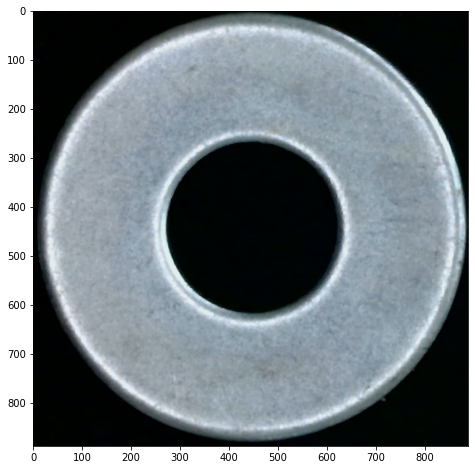

In [100]:
showImg(get_flip_x(img))